This Python-code runs the Python program 'run_polymer_simulation_once.ipynb' many times to obtain better statistics. The quantities - written in 'quantities_summed.dat' - are summed during each simulation run. Finally, the quantities are divided by number of simulation runs to obtain an average.

# Import of libraries 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import datetime

# Set datetime and create subfolder for results

In [2]:
#set current date and time
DATETIME = datetime.datetime.now()
current_datetime = (str(DATETIME.year)+str(DATETIME.month)+str(DATETIME.day)+
                   str(DATETIME.hour)+str(DATETIME.minute)+str(DATETIME.second))

#create a folder for results (if not exists already)
try:
    os.makedirs("results")

except FileExistsError:
    #directory already exists
    pass

#create directory in folder 'results' to save results from every single simulation
os.makedirs("results/"+current_datetime)

In [3]:
#make short pathname for directory with results
path_results = "results/"+current_datetime+"/"

# Initialization and calculation of basic parameters

Initial parameters (fixed values for all simulation) are defined in the Initialization. Then, they are written to another python-file, 'init_parameters.ipynb'. The program 'run_polymer_simulation_once.ipynb' load this initial parameters from the file 'init_parameters.py' every time it is called. Attention: This extra file 'init_parameters.ipynb' is needed because a python program cannot load variables from this file ('main_code.ipynb') while it is run.

In [4]:
#define number of polymers segments (monomers)
Monomers = 50

#define number of bonds between segments
Bonds = Monomers - 1

#define spring constant (Rouse model) for bonds between segments in units energy/distance^2
k = 1

#define number of passive particles
n_passive_particles = 0

#define number of active particles
n_active_particles = 0

#define drag-coefficient constant gamma
gamma = 1

#define rest distance between segments
r0 = 0

#define temperature in units of kT
kT = 1

#define integration step time
dt = 0.01

#define number of integration steps
integration_steps = 100000

#define numer of point for graphical representation and used for fits (number of callbacks)
number_of_points = 1000

In [5]:
#set epsilon and sigma for Lennard_jones potential between different particles
lj_epsilon_AA = 0
lj_sigma_AA = 0
lj_epsilon_AB = 0
lj_sigma_AB = 0
lj_epsilon_BB = 0
lj_sigma_BB = 0

#set cut-off radius for potential between two particles
r_cut = 2.5

In [6]:
#set number of executions of one entire simulation
number_of_simulations = 1000

In [7]:
#calculate Kuhn length b
Kuhn_length_b = math.sqrt(3*kT/k)

#calculate Rouse time (Rouse mode = 1)
tau_rouse_theory = gamma*Monomers**2*Kuhn_length_b**2 / (3*np.pi**2*kT)

#define maximum time
t_max = dt*integration_steps

Create file 'initial_values.py' and write the set parameters into it; this file is called every time when the simulation 'run_polymer_simulation_once.py' starts.

In [8]:
#write initial parameters in SAME directory as python-codes
file_init_parameters = open('initial_parameters.py', 'w')

init_parameters = (

    "current_datetime = "       +current_datetime+"\n"           +  
    "Monomers = "               +str(Monomers)+"\n"              +
    "Bonds = "                  +str(Bonds)+"\n"                 +
    "k = "                      +str(k)+"\n"                     +
    "n_passive_particles = "    +str(n_passive_particles)+"\n"   +
    "n_active_particles = "     +str(n_active_particles)+"\n"    +
    "lj_epsilon_AA = "          +str(lj_epsilon_AA)+"\n"         +
    "lj_sigma_AA = "            +str(lj_sigma_AA)+"\n"           +
    "lj_epsilon_AB = "          +str(lj_epsilon_AB)+"\n"         +
    "lj_sigma_AB = "            +str(lj_sigma_AB)+"\n"           +
    "lj_epsilon_BB = "          +str(lj_epsilon_BB)+"\n"         +
    "lj_sigma_BB = "            +str(lj_sigma_BB)+"\n"           +
    "r_cut = "                  +str(r_cut)+"\n"                 +
    "gamma = "                  +str(gamma)+"\n"                 +
    "r0 = "                     +str(r0)+"\n"                    +
    "kT = "                     +str(kT)+"\n"                    +
    "dt = "                     +str(dt)+"\n"                    +
    "integration_steps = "      +str(integration_steps)+"\n"     +
    "number_of_points = "       +str(number_of_points)+"\n"      +
    "number_of_simulations = "  +str(number_of_simulations)+"\n" +
    "Kuhn_length_b = "          +str(Kuhn_length_b)+"\n"         +
    "tau_rouse_theory = "       +str(tau_rouse_theory)+"\n"      +
    "t_max = "                  +str(t_max))

file_init_parameters.write(init_parameters)

file_init_parameters.close()


# Create empty file to safe simulated quantities and set every value to 0

In [9]:
#create empty file to called 'quantities_summed.dat' to safe the simulated quantities
quantities_file = open(path_results+'quantities_summed.dat', 'w')

for integration_step in range (0, int(integration_steps) + 2):
        
    #set all quantities to 0
    quantities_file.write('0	0	0	0\n')

#close the file
quantities_file.close()


# Run the entire simulation many times (using for-loop)

In [ ]:
#run the entire simulation 'run_polymer_simulation_once.ipynb' many times
for run in range(number_of_simulations):
    
    #execute entire simulation
    print ("Step "+str(run+1)+" out of "+str(number_of_simulations))
    %run run_polymer_simulation_once.ipynb

# Average quantities and save plots

As mentioned above, in every simulation run results (regarding each quantity and each timestep) are summed. Here, this sums are divided by the number of simulation to obtain an average (regarding each quantity and each timestep) and save into a dat-file in the folder 'results/current_datetime'.

In [11]:
#open quantities file
quantities_file = open(path_results+"quantities_summed.dat")

#load all lines, begin with second line (1.line is description)
all_lines = quantities_file.readlines()[0:]

#close quantities file
quantities_file.close()

In [12]:
#create also file with initial parameters

file_init_parameters = open(path_results+'initial_parameters.py', 'w')
file_init_parameters.write(init_parameters)
file_init_parameters.close()

In [13]:
#to save averaged quantities in current_datetime folder, create file
averaged_quantities = open(path_results+'quantities_averaged.dat', 'w')

#write header into file
averaged_quantities.write("#time	sq_end_to_end_distance	sq_distance_of_cm	auto_corr_ee_vector\n")

#fill file with averaged quantities; start from second line (range(1 --> len(all_lines))
for line in range(1, len(all_lines)):

    """Divide all quantities by number of simulation and save them into file."""
        
    averaged_quantities.write(str(float(all_lines[line].split('	')[0])*dt)+"	"+
                              str(float(all_lines[line].split('	')[1]) /
                                number_of_simulations)+"	"+
                              str(float(all_lines[line].split('	')[2]) /
                                number_of_simulations)+"	"+
                              str(float(all_lines[line].split('	')[3]) /
                                number_of_simulations)+"\n")

#close the file
averaged_quantities.close()

# Open folder (name=datetime) and create plots from data

In this section, the data (arrays) are transformed into numpy arrays. Data and fits are plotted; plots are saved. Results are saved in subdirectories using current date and time; the simulation conditions are there explicitly described by an additional .dat-file.

In [14]:
#load parameters
sys.path.append(path_results)
import initial_parameters

Monomers = initial_parameters.Monomers
gamma = initial_parameters.gamma
Bonds = initial_parameters.Bonds
Kuhn_length_b = initial_parameters.Kuhn_length_b
tau_rouse_theory = initial_parameters.tau_rouse_theory

In [15]:
#open quantities file
averaged_quantities = open(path_results+'quantities_averaged.dat')

#load all lines from file with averaged quantites
all_lines = averaged_quantities.readlines()[0:]

#create lists for quantities for graphical representation (plots)
list_of_times = []
list_of_sq_end_to_end_distances = []
list_of_sq_distance_of_cm = []
list_of_auto_corr_ee_vector = []

#start from second line, first line is description
for line in range(1, len(all_lines)):

    #append time to list (time = callback-period * dt)
    list_of_times.append((float(all_lines[line].split('	')[0])))

    #squared end-to-end distance
    list_of_sq_end_to_end_distances.append(
        float(all_lines[line].split('	')[1]))

    #distance of centre of mass from origin
    list_of_sq_distance_of_cm.append(
        float(all_lines[line].split('	')[2]))

    #auto-correlation of end-to-end vector
    list_of_auto_corr_ee_vector.append(
        float(all_lines[line].split('	')[3]))

#close the file
averaged_quantities.close()

In [16]:
#create file to safe initial parameters and results
results_dat = open(path_results+'results.dat', 'w')

#write initial parameters
results_dat.write(init_parameters+"\n\n"+"-------"
                                    "results:\n\n")

444

In [17]:
#set plot parameters

#change figure size
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 9
figure_size[1] = 6
plt.rcParams['figure.figsize'] = figure_size

#set line width
plt.rcParams['lines.linewidth'] = 4

#set label size in the plots
plt.rcParams.update({'font.size': 18})

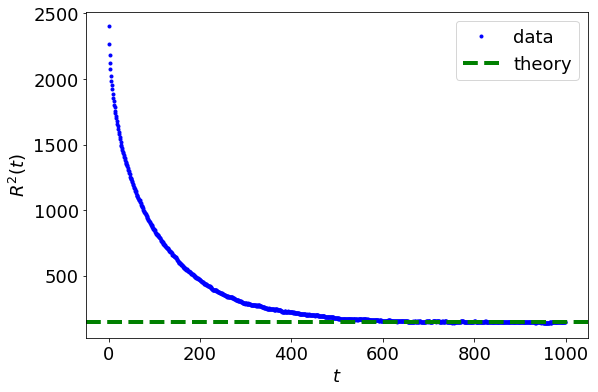

End-to-end distance in equilibrium (theory) = 146.99999999999997


In [18]:
#plot squared end-to-end distance as function of time

#convert array into numpy array and use short names
t = np.array(list_of_times)
y = np.array(list_of_sq_end_to_end_distances)

#plot the results
plt.plot(t, y, 'b.', label='data')
plt.axhline(y=(Bonds*Kuhn_length_b**2),color='g', linestyle='--',label=('theory'))

#write theoretical results into file
results_dat.write("Squared end-to-end distance in eq."+
                  "(Bonds * Kuhn_length_b^2) = "+
                  str(Bonds*Kuhn_length_b**2)+"\n\n")

#save the plot
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.ylabel(r'$R^2(t)$')
plt.draw()
plt.savefig(path_results+'sq_end_to_end_distance.png')
plt.show()
plt.close()

print ("End-to-end distance in equilibrium (theory) = "+str(Bonds*Kuhn_length_b**2))

The plot above shows the change in squared end-to-end distance of the polymer. The theoretical value in quilibrium is equal to $N\,b^2$ ($N\,=\,$number of bonds, $b\,=\,$statistical lenght (Kuhn lenght)) and is shown as green dashed line.

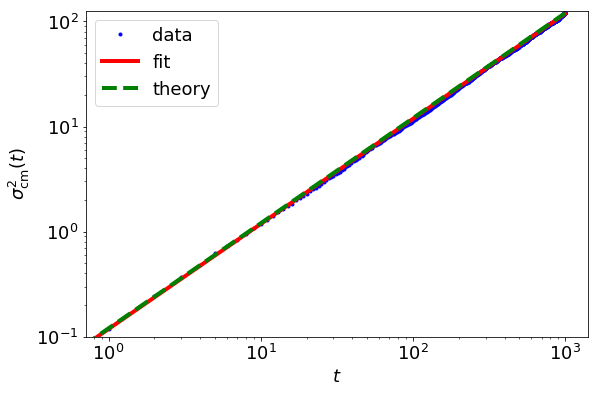

factor_phi (theory)= 0.12
factor_phi (simultaion)= [0.11824667]


In [19]:
#plot squared motion of center of mass

#covert arrays into numpy arrays and use short names (use t and y)
t = np.array(list_of_times)
y = np.array(list_of_sq_distance_of_cm)

#define fit function; take independent variable as first argument
def func_motion_of_cm(t, const_cm):
    return const_cm*t

#fit the curve using function, t-values and y-values; return: optimal parameters and covariances
popt, pcov = curve_fit(func_motion_of_cm, t, y)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#calculate theoretical results
const_cm_theory = 6*kT/gamma/Monomers

#write theoretical and simulated results into file
results_dat.write("motion of center of mass:\n"+
                  "6*kT/gamma/Monomers (theory) = "
                  +str(const_cm_theory)+"\n"
                  
                  "6*kT/gamma/Monomers (simulation) = "
                  +str(popt)+" +/- "
                  +str(perr)+"\n\n")

#plot the results
plt.plot(t, y, 'b.', label='data')
plt.plot(t, func_motion_of_cm(t, *popt), 'r-', label=('fit'))
plt.plot(t, const_cm_theory*t, 'g--', label=('theory'))

#save the plot
plt.legend(loc='best')

#set y range due to use of log-representation (otherwise y axis starts at extremely small values)
plt.ylim(0.1, None)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$t$')
plt.ylabel(r'$\sigma_{\mathrm{cm}}^2(t)$')
plt.draw()
plt.savefig(path_results+'sq_distance_of_cm.png')
plt.show()
plt.close()

print ("factor_phi (theory)= "+str(const_cm_theory))
print ("factor_phi (simultaion)= "+str(popt))

The plot above shows the motion of center of mass. Represented is the squared distance between current and initial position of center of mass. The red line is the fit, the green line the theoretical progress; the formula is: $\text{factor}_{\phi}\,\cdot\,t\,=\,\sigma^2_{\text{cm}}(t)\,=\,\frac{6\,k_{\text{B}}\,T}{\gamma\,/\,\left(N\,+\,1\right)}\,t$. $\gamma$ is the friction coefficient and $\left(N\,+\,1\right)$ the number of monomers (segments).

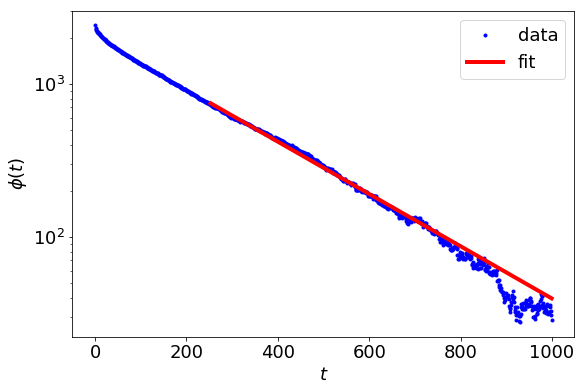

rouse time (theory) = 253.30295910584442
rouse time (simulation) = 254.20001709978612


In [20]:
#plot auto-correlation end-to-end vector as function of time

#covert arrays into numpy arrays and use short names (full=all values)
t = np.array(list_of_times)
y = np.array(list_of_auto_corr_ee_vector)

#find index of time array so that the corresponding time is close to rouse_time
index_tau_rouse = (np.abs(t - tau_rouse_theory)).argmin()

#use 'valid' points for fit (after relaxation time)
t_valid = t[index_tau_rouse:]
y_valid = y[index_tau_rouse:]

#define fit function; take independent variable as first argument
def func_auto_corr_ee_vec(t, const_auto_corr, inverse_tau_rouse):
    
    #use instead of 1/tau_rouse inverse_tau_rouse, otherwise fit fails
    return const_auto_corr*np.exp(-t*inverse_tau_rouse)

#fit the curve using function, t-values and y-values
popt, pcov = curve_fit(func_auto_corr_ee_vec, t_valid, y_valid, [0, 0])

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#write theoretical and simulated results into file
results_dat.write("Attention: different offset due to different initial form of polymer!"+
                  "motion of center of mass:\n"+

                  "rouse time (theory) = "+str(tau_rouse_theory)+"\n"+
                  
                  #Attention: rouse time = 1/inverse_tau_rouse
                  "rouse time (simulation) = "+
                  str(1/popt[1])+" +/- "+
                  
                  #Attention: Because of transformation of iverse tau rouse into tau_rouse
                  #the error has to be transformed according to propagation of uncertainty
                  str(math.sqrt((-1/popt[1]**2)**2)*perr[1])+"\n\n")

#plot the results
plt.plot(t, y, 'b.', label='data')
plt.plot(t_valid, func_auto_corr_ee_vec(t_valid, *popt), 'r-', label=('fit'))
#plt.plot(t, const_auto_corr*np.exp(-t/tau_rouse_theory), 'g--', label=('theory; offset depends on initial form of polymer'))

#save plot
plt.legend(loc='best')
plt.xlabel(r'$t$')
plt.yscale('log')
plt.ylabel(r'$\phi(t)$')
plt.draw()
plt.savefig(path_results+'auto_corr_ee_vector.png')
plt.show()
plt.close()

print ("rouse time (theory) = "+str(tau_rouse_theory))
print ("rouse time (simulation) = "+str(1/popt[1]))

The plot above represents the auto-correlation of end-to-end vector. For $t\,\gtrsim\,\tau_{\text{R}}\,=\,\frac{\gamma\,N^2\,b^2}{3\,\pi^2\,k_{\text{B}}\,T}$ (Rouse time), the auto-correlation decays exponentially with $\phi(t)\,\propto\,\exp(-t/\tau_{\text{R}})$. The red line represents the fit (for $t\,\gtrsim\,\tau_{\text{R}}$) of form: $\text{const.}\,\cdot\,\exp(-t/\tau_{\text{R, simul. result}})$.

In [21]:
#close file (where results were saved)
results_dat.close()